### Acceleration Data with Noise ###
Here we construct an idealized acceleration function that models the height measurement experiment. We add noise and show that the numerical integration is fairly robust to the presence of noise.

In [10]:
# Load the modules
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

### Model acceleration ###
Here we propose a plausible model for the acceleration function and compute its antiderivatives to determine velocity and position.

#### Visualize Idealized Acceleration Function ####


In [6]:
# acceleration function
def a_vec(t_array):
    t_array = np.asarray(t_array)

    # Define the conditions
    conds = [
        (0 <= t_array) & (t_array < 1),
        (1 <= t_array) & (t_array < 2),
        (2 <= t_array) & (t_array < 3),
        (3 <= t_array) & (t_array < 7),
        (7 <= t_array) & (t_array < 8),
        (8 <= t_array) & (t_array < 9),
        (9 <= t_array) & (t_array <= 10),
    ]

    # Define the corresponding expressions
    funcs = [
        0,
        t_array - 1,
        -t_array + 3,
        0,
        -t_array + 7,
        t_array - 9,
        0
    ]

    # Compute piecewise values
    result = np.select(conds, funcs, default=0)

    return result


In [12]:
X=np.linspace(0,10,1000)
df_data = pd.DataFrame(dict(x=X))
df_data.head()

,x
0,0.00000
1,0.01001
2,0.02002
3,0.03003
4,0.04004


In [14]:
# Dataframe for idealized acceleration, velocity, and position
df_data['a'] = a_vec(df_data['x'])
dt = X[1]-X[0]
# compute velocity and position using numerical method
df_data['v'] = df_data['a'].cumsum()*dt
df_data['s'] = df_data['v'].cumsum()*dt

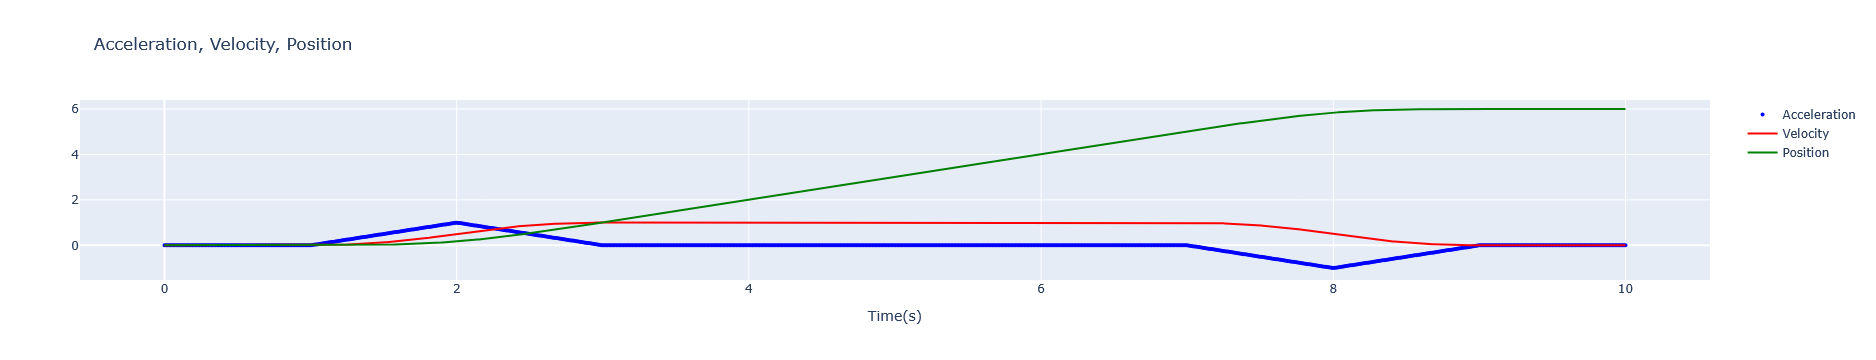

In [41]:
fig_data = go.Figure()
# Update layout if desired
fig_data.update_layout(
    title="Acceleration, Velocity, Position",
    xaxis_title="Time(s)",
    yaxis_title=""
)
# Add the acceleration trace
fig_data.add_trace(go.Scatter(x=df_data['x'], y=df_data['a'], mode='markers', name='Acceleration', marker=dict(color='blue', size=4)))
# Add the velocity trace
fig_data.add_trace(go.Scatter(x=df_data['x'], y=df_data['v'], mode='lines', name='Velocity', line=dict(color='red')))
# Add the position trace
fig_data.add_trace(go.Scatter(x=df_data['x'], y=df_data['s'], mode='lines', name='Position', line=dict(color='green')))

fig_data.show()

### Acceleration as noisy data ###
Add some normally distributed, zero-mean noise with 0.5 standard deviation to the acceleration data.

In [20]:
X=np.linspace(0,10,1000)
df_data_noise = pd.DataFrame(dict(x=X))
df_data_noise.head()
dt = X[1]-X[0]

In [30]:
noise = np.random.normal(loc=0.0, scale=0.2, size=len(X))
df_data_noise['a'] = a_vec(df_data_noise['x']) + noise
# compute velocity and position using numerical method
df_data_noise['v'] = df_data_noise['a'].cumsum()*dt
df_data_noise['s'] = df_data_noise['v'].cumsum()*dt

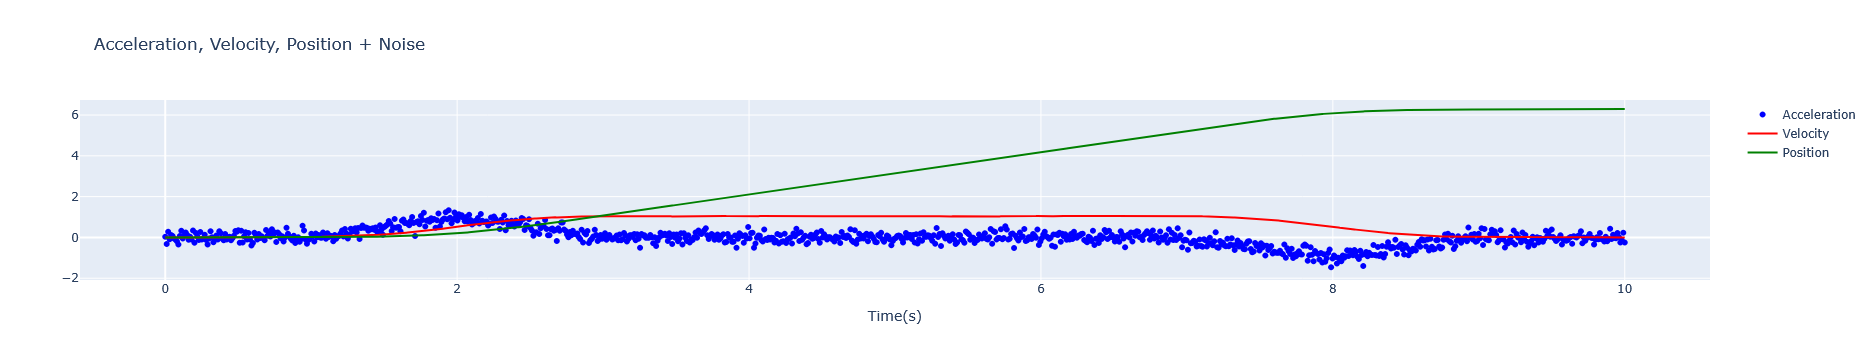

In [32]:
fig_data_noise = go.Figure()
# Update layout if desired
fig_data_noise.update_layout(
    title="Acceleration, Velocity, Position + Noise",
    xaxis_title="Time(s)",
    yaxis_title=""
)
# Add the acceleration trace
fig_data_noise.add_trace(go.Scatter(x=df_data_noise['x'], y=df_data_noise['a'], mode='markers', name='Acceleration', line=dict(color='blue')))
# Add the velocity trace
fig_data_noise.add_trace(go.Scatter(x=df_data_noise['x'], y=df_data_noise['v'], mode='lines', name='Velocity', line=dict(color='red')))
# Add the position trace
fig_data_noise.add_trace(go.Scatter(x=df_data_noise['x'], y=df_data_noise['s'], mode='lines', name='Position', line=dict(color='green')))

fig_data_noise.show()